In [3]:
from sklearn import preprocessing
from sklearn import model_selection

from evopipe import steps, evopipe
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
digits = datasets.load_digits()
train_X, test_X, train_Y, test_Y = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

params = steps.get_params(len(train_X[0]))

In [2]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("GridSearch score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for name, cls in steps.clfs.items():
        classif = cls()
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(model_selection.cross_val_score(classif, test_X, test_Y).mean())
        
        pipe_params = params[name]
        gs = model_selection.GridSearchCV(classif, pipe_params, n_jobs=-1, verbose=5)
        gs.fit(train_X, train_Y)
        
        print(gs.best_params_)
        print(gs.score(test_X, test_Y))
        print()

Format:
------------
Classifier
score
cross-validation score
GridSearch score
------------

SVC


NameError: name 'train_X' is not defined

In [3]:
clf = evopipe.EvoPipeClassifier(steps.preproc, steps.clfs, params)
clf.fit(train_X, train_Y, test_X, test_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe, score in best_pipes:
    pipe.fit(train_X, train_Y)
    # score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))

evaluating: [('PCA', OrderedDict([('n_components', 3), ('whiten', False)])), ('Normalizer', OrderedDict()), ('SGD', OrderedDict([('alpha', 0.001), ('epsilon', 0.05), ('eta0', 0.5), ('l1_ratio', 0.15), ('learning_rate', 'constant'), ('loss', 'log'), ('n_iter', 5), ('penalty', 'l1'), ('power_t', 0.1)]))]Evolution starting...
evaluating: [('PCA', OrderedDict([('n_components', 3), ('whiten', False)])), ('Normalizer', OrderedDict()), ('LinearSVC', OrderedDict([('C', 2), ('loss', 'hinge'), ('penalty', 'l2'), ('tol', 0.001)]))]
Gen 2:

evaluating: [('RandomForest', OrderedDict())]
Gen 3:

evaluating: [('SGD', OrderedDict([('alpha', 0.001), ('epsilon', 0.05), ('eta0', 0.5), ('l1_ratio', 0.15), ('learning_rate', 'constant'), ('loss', 'log'), ('n_iter', 5), ('penalty', 'l1'), ('power_t', 0.1)]))]
Gen 4:

evaluating: [('StandardScaler', OrderedDict()), ('logR', OrderedDict([('C', 2), ('penalty', 'l2'), ('solver', 'sag'), ('tol', 0.001)]))]
Gen 5:

evaluating: [('Binarizer', OrderedDict()), ('SGD'

   	                        fitness                         	                       train_test                       
   	--------------------------------------------------------	--------------------------------------------------------
gen	var        	avg     	min     	max     	var        	avg     	min      	max     
0  	0.0808481  	0.769424	0.106147	0.964368	0.0811404  	0.763   	0.0844444	0.962222
1  	0.0100288  	0.927502	0.442323	0.99033 	0.00982271 	0.920074	0.442222 	0.984444
2  	0.00529873 	0.947028	0.586506	0.99033 	0.00437119 	0.944519	0.642222 	0.984444
3  	0.000190032	0.976727	0.937696	0.99033 	0.000180658	0.972222	0.935556 	0.984444
4  	0.00478017 	0.955854	0.699967	0.99033 	0.00478271 	0.953259	0.697778 	0.984444
5  	0.000143647	0.980044	0.946663	0.99033 	9.37229e-05	0.976074	0.944444 	0.984444
6  	0.000208988	0.980102	0.94081 	0.99033 	0.00015583 	0.976296	0.942222 	0.984444
7  	0.00272512 	0.9781  	0.699967	0.99033 	0.0026673  	0.972741	0.697778 	0.984444
8  	2.42768e-05	0

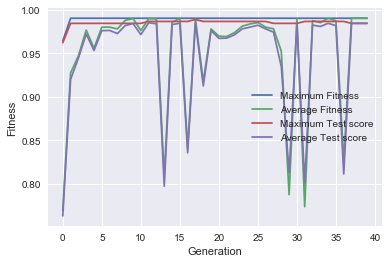

In [5]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.chapters["fitness"].select("avg", "min", "max", "var")
avgs_tt, mins_tt, maxs_tt, vars_tt = clf.logbook.chapters["train_test"].select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, maxs, label='Maximum Fitness')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

line2 = ax1.plot(gen, avgs, label='Average Fitness')

line3 = ax1.plot(gen, maxs_tt, label='Maximum Test score')
line4 = ax1.plot(gen, avgs_tt, label='Average Test score')

lines = line1 + line2 + line3 + line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="best")

plt.show()